In [1]:
# df = pd.read_hdf('/home/klay6683/output/l1a_dark_scans/results_df.h5', 'df')
df = pd.read_hdf('/Users/klay6683/data/iuvs/dark_stuff/results_df.h5', 'df')

In [2]:
df.head()

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,BITPIX,BLANK,BUNDLE_ID,CADENCE,CAPTURE,CASE_TEMP,CHANNEL,...,SPE_OFS,SPE_SIZE,SW_VER,TARGET_NAME,TIMESTAMP,UTC,XUV,mean,median,std
0,929,LINEAR linear_0004,"LINEAR 5,6 linear_0004",32,-1,raw,4.8,2014/338 Dec 04 02:03:22.79468UTC,15972,FUV,...,0,4,929,MARS,4.709306e+08,2014/338 Dec 04 02:03:22.79468UTC,FUV,1024.759487,993.5,242.897055
1,929,LINEAR linear_0006,"LINEAR 5,6 linear_0006",32,-1,raw,4.8,2015/008 Jan 08 18:21:38.42850UTC,15964,FUV,...,0,4,929,MARS,4.740133e+08,2015/008 Jan 08 18:21:38.42850UTC,FUV,1098.962612,1063.0,263.214653
2,929,LINEAR linear_0006,"LINEAR 5,6 linear_0006",32,-1,raw,4.8,2015/008 Jan 08 18:21:38.42850UTC,15964,FUV,...,0,4,929,MARS,4.740133e+08,2015/008 Jan 08 18:21:43.22849UTC,FUV,1012.230469,974.0,239.967113
3,929,LINEAR linear_0004,"LINEAR 15,16 linear_0004",32,-1,raw,15.0,2014/336 Dec 02 05:40:46.04215UTC,15928,FUV,...,65,4,929,MARS,4.707708e+08,2014/336 Dec 02 05:40:46.04215UTC,FUV,1469.102174,1393.0,398.650876
4,929,LINEAR CSS_S4,"LINEAR 17,18 CSS_S4",32,-1,raw,15.0,2014/291 Oct 18 17:54:10.74999UTC,15929,MUV,...,2,34,NaN,,4.669268e+08,2014/291 Oct 18 17:54:10.74999UTC,MUV,15498.593333,15320.0,1563.283871


### removing items that don't change

In [3]:
to_drop = []
for col in df:
    n_unique = len(df[col].unique())
    if n_unique == 1:
        print(col)
        print(df[col].unique())
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

BITPIX
[32]
BLANK
[-1]
BUNDLE_ID
['raw']
EXTEND
[True]
GRATING_SELECT
['LOWRES']
KEYHOLE_SELECT
['NEITHER']
OBSERVATION_TYPE
['CDS']
ORBIT_SEGMENT
[0]
SIMPLE
[True]


In [4]:
df['CAPTURE'] = df.CAPTURE.map(io.iuvs_utc_to_dtime)

In [5]:
df.UTC = df.UTC.map(io.iuvs_utc_to_dtime)

In [6]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CAPTURE', 'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'ET', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'SW_VER', 'TARGET_NAME', 'TIMESTAMP', 'UTC', 'XUV', 'mean',
       'median', 'std'],
      dtype='object')

In [7]:
df.rename(columns=lambda x: 'TIME_OF_INT' if x=='UTC' else x, inplace=True)

In [8]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CAPTURE', 'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'ET', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'SW_VER', 'TARGET_NAME', 'TIMESTAMP', 'TIME_OF_INT', 'XUV',
       'mean', 'median', 'std'],
      dtype='object')

### Remove all times apart of time of integration for now

In [9]:
df = df.drop('et timestamp capture'.upper().split(), axis=1)

In [10]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'SW_VER', 'TARGET_NAME', 'TIME_OF_INT', 'XUV', 'mean',
       'median', 'std'],
      dtype='object')

### remove data where there is no binning information

In [11]:
df = df[~df.SPA_OFS.isnull()]

### CHANNEL and XUV are the same so remove one of it

In [12]:
(df.XUV == df.CHANNEL).all()

True

In [13]:
df = df.drop(['XUV'], axis=1)

In [14]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'SW_VER', 'TARGET_NAME', 'TIME_OF_INT', 'mean', 'median',
       'std'],
      dtype='object')

### Also PROCESS and PRODUCT_CREATION_DATE are the same and I remove the longer column title version

In [15]:
(df['PROCESS'] == df['PRODUCT_CREATION_DATE']).all()

True

In [16]:
df = df.drop(['PRODUCT_CREATION_DATE'], axis=1)

In [17]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'SPA_OFS', 'SPA_SIZE', 'SPE_OFS', 'SPE_SIZE', 'SW_VER', 'TARGET_NAME',
       'TIME_OF_INT', 'mean', 'median', 'std'],
      dtype='object')

### Having PRODUCT_ID I don't need FILENAME 

In [18]:
df = df.drop(['FILENAME'], axis=1)

In [19]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS',
       'SPA_SIZE', 'SPE_OFS', 'SPE_SIZE', 'SW_VER', 'TARGET_NAME',
       'TIME_OF_INT', 'mean', 'median', 'std'],
      dtype='object')

#### creating little checking function:

In [20]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

### Combine binning sets into one tuple

In [21]:
def combine_binning_data(row):
    return tuple(int(row[col]) for col in ['SPE_OFS', 'SPE_SIZE', 'SPA_OFS', 'SPA_SIZE'])

In [22]:
# not sure why I need to do this for the next step, but it's not bad anyway.
df.set_index('TIME_OF_INT', inplace=True)

In [24]:
df.dtypes

ANC_SVN_REVISION              int64
BIN_PATTERN_INDEX            object
BIN_TBL                      object
CADENCE                     float64
CASE_TEMP                   float64
CHANNEL                      object
CODE_SVN_REVISION           float64
COLLECTION_ID                object
DET_TEMP                    float64
DUTY_CYCLE                  float64
FOV_DEG                     float64
INT_TIME                    float64
LYA_CENTROID                  int64
MCP_VOLT                    float64
MIRROR_DEG                  float64
MIRROR_DN                   float64
MIR_DEG                     float64
MISSION_PHASE                object
NAXIS                         int64
NAXIS1                        int64
NAXIS2                        int64
NAXIS3                      float64
N_FILL                        int64
OBS_ID                        int64
ORBIT_NUMBER                  int64
PROCESS                      object
PRODUCT_ID                   object
SOLAR_LONGITUDE             

In [26]:
nonan = df.dropna(how='any')

In [27]:
nonan[['SPE_OFS', 'SPE_SIZE', 'SPA_OFS', 'SPA_SIZE', 'TIME_OF_INT']].apply(combine_binning_data, axis=1)

ValueError: Shape of passed values is (12542, 4), indices imply (12542, 5)

In [22]:
df['BINNING_SET'] = df.apply(combine_binning_data, axis=1)
df = df.drop('spe_size spe_ofs spa_size spa_ofs'.upper().split(), axis=1)

ValueError: Shape of passed values is (17716, 4), indices imply (17716, 38)

In [24]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SW_VER',
       'TARGET_NAME', 'mean', 'median', 'std', 'BINNING_SET'],
      dtype='object')

In [28]:
check_values('collection_id')

limb           7949
disk           5967
corona         3176
occultation     394
transition      105
                 73
cruise           52
dtype: int64

In [29]:
check_values('lya_centroid')

 1    13696
-1     4020
dtype: int64

In [26]:
df.sort_index(inplace=True)

In [27]:
check_values('int_time')

14.4    8233
4.2     7834
1.4      676
2.0      394
29.4     336
1.0       98
60.0      75
1.9       36
6.0       18
4.0       12
0.2        2
16.0       2
dtype: int64

In [67]:
lya = df.LYA_CENTROID == 1
collection_id = df.COLLECTION_ID == 'disk'
int_time = df.INT_TIME == 14.4
xuv = df.CHANNEL == 'MUV'

In [68]:
filtered = df[lya & collection_id & int_time & xuv]

In [69]:
s = filtered.PRODUCT_ID.str.split('_')

In [70]:
s = s.map(lambda x: x[3]).str.split('-')

In [71]:
s.map(lambda x: x[0]).value_counts()

apoapse    2478
outdisk     148
dtype: int64

In [72]:
filtered.BINNING_SET.value_counts()

(2, 34, 101, 80)     1820
(0, 4, 101, 80)       352
(140, 8, 101, 80)     301
(0, 4, 96, 115)        88
(140, 8, 96, 115)      60
(0, 1, 0, 1)            4
(0, 16, 0, 16)          1
dtype: int64

In [74]:
binset = filtered.BINNING_SET == (2, 34, 101, 80)

In [75]:
filtered[binset].filter(regex='NAXIS')

,NAXIS,NAXIS1,NAXIS2,NAXIS3
TIME_OF_INT,,,,
2014-11-12 02:58:56.475690,2,30,10,NaN
2014-11-12 03:09:59.476110,2,30,10,NaN
2014-11-12 03:21:03.222060,2,30,10,NaN
2014-11-12 03:32:04.970930,2,30,10,NaN
2014-11-12 03:43:09.217920,2,30,10,NaN
2014-11-12 03:54:12.218340,2,30,10,NaN
2014-11-12 04:05:15.463250,2,30,10,NaN
2014-11-12 04:16:18.214190,2,30,10,NaN
2014-11-12 12:11:15.621540,2,30,10,NaN


In [34]:
cols_of_interest = df.columns.drop('anc_svn_revision  bin_tbl code_svn_revision obs_id'
                                   ' orbit_number process product_id'.upper().split())

In [35]:
# df.CHANNEL = df.CHANNEL.map(lambda x: 0 if x=='MUV' else 1)

In [36]:
df=df[cols_of_interest]
# df = df.select_dtypes(include=[float, int])
# df= df.drop('SW_VER NAXIS3'.split(), axis=1)

In [37]:
df = df.dropna(how='any')

In [38]:
df.to_hdf('/Users/klay6683/data/iuvs/dark_stuff/to_study.h5','df')

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['BIN_PATTERN_INDEX', 'CHANNEL', 'COLLECTION_ID', 'MISSION_PHASE', 'TARGET_NAME', 'BINNING_SET']]

  warnings.warn(ws, PerformanceWarning)



In [40]:
df.head()

,CADENCE,CASE_TEMP,CHANNEL,DET_TEMP,DUTY_CYCLE,FOV_DEG,INT_TIME,LYA_CENTROID,MCP_VOLT,MIRROR_DEG,MIRROR_DN,MIR_DEG,NAXIS,NAXIS1,NAXIS2,N_FILL,SOLAR_LONGITUDE,mean,median,std
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,
2013-12-04 19:02:17.420740,2,14456,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.333862,241.076477,229,75.493331
2013-12-04 19:02:17.420740,2,14456,0,2402,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.333862,213.668213,202,66.896731
2013-12-04 19:03:04.420770,2,14455,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.334099,23373.713318,24218,6042.129036
2013-12-04 19:03:04.420770,2,14455,0,2400,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.334099,17524.360107,17720,4284.540316
2014-04-25 00:07:44.265320,61,15825,5,2361,1,0.494385,60,-1,-1.830,0.247192,13029,0.250,2,512,256,0,121.203468,520.624687,436,348.122660


In [44]:
from bokeh.sampledata.autompg import autompg

In [45]:
autompg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [46]:
from bokeh.crossfilter.models import CrossFilter

In [48]:
CrossFilter??

# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [180]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

<IPython.core.display.Javascript object>


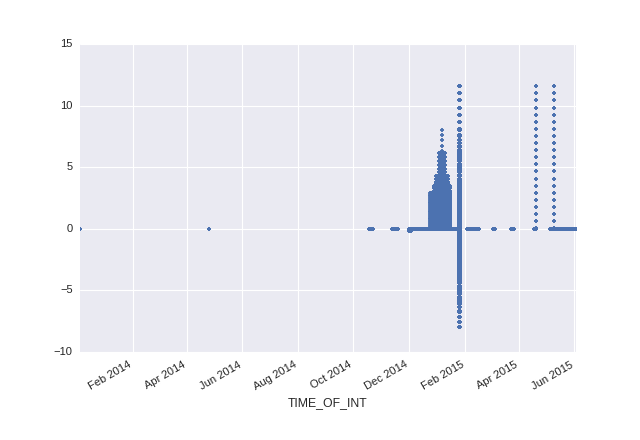

In [179]:
plt.figure()
df.mirdeg_delta.plot(style='.')

<IPython.core.display.Javascript object>


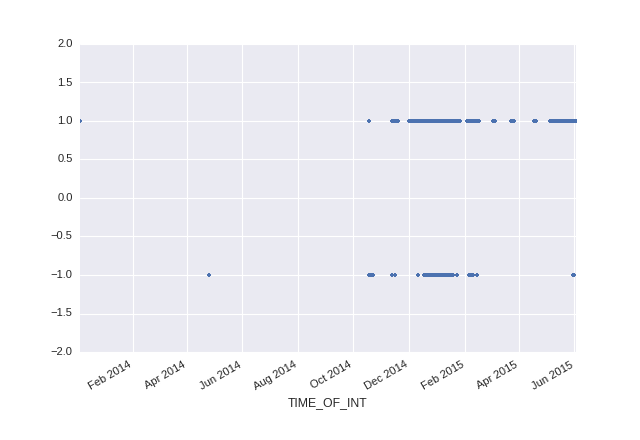

In [184]:
plt.figure()
df.LYA_CENTROID.plot(style='.', ylim=(-2, 2))